<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW12/Image_k_means_clustering_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import imageio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/Shareddrives/PUS2020/

/content/drive/Shareddrives/PUS2020


 read in an image of madrid stored in the PUS2020 shared drive as "data/Madrid.jpg" and preprocess it appropriately for clustering

In [4]:
op = imageio.imread('data/Madrid.jpg')


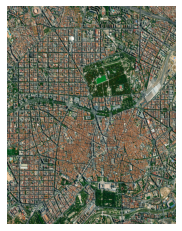

In [5]:
pl.imshow(op)
pl.axis('off');

In [6]:
from sklearn.cluster  import KMeans

In [7]:
# make sure the image only contains 3 color channels:
op.shape

(1000, 774, 3)

In [8]:
# preprocess the image with the sklearn.preprocessing.minmax_scale option: we want wach color channel to be in the range 0-1
from sklearn import preprocessing
d0 = preprocessing.minmax_scale(op[:,:,0])
d1 = preprocessing.minmax_scale(op[:,:,1])
d2 = preprocessing.minmax_scale(op[:,:,2])
Xopscaled = np.dstack((d0, d1, d2))
Xopscaled.shape

(1000, 774, 3)

In [9]:
Xopscaled

array([[[0.72941176, 0.47736626, 0.35102041],
        [0.61788618, 0.63478261, 0.63942308],
        [0.66798419, 0.65966387, 0.65350877],
        ...,
        [0.29527559, 0.26339286, 0.24423963],
        [0.54901961, 0.42682927, 0.33870968],
        [0.48627451, 0.37394958, 0.36326531]],

       [[0.81176471, 0.6090535 , 0.49795918],
        [0.6504065 , 0.66086957, 0.62019231],
        [0.27272727, 0.33193277, 0.36842105],
        ...,
        [0.51181102, 0.40625   , 0.29953917],
        [0.34901961, 0.29674797, 0.22983871],
        [0.22352941, 0.14705882, 0.13877551]],

       [[0.87843137, 0.70781893, 0.62857143],
        [0.6300813 , 0.66521739, 0.63942308],
        [0.12252964, 0.17647059, 0.22368421],
        ...,
        [0.58661417, 0.44196429, 0.36866359],
        [0.69019608, 0.47560976, 0.34677419],
        [0.58039216, 0.40336134, 0.31020408]],

       ...,

       [[0.22745098, 0.16460905, 0.12653061],
        [0.26829268, 0.28695652, 0.14903846],
        [0.56521739, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


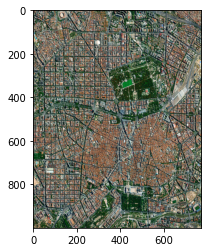

In [13]:
#show the prepreocessed image
pl.imshow(Xopscaled)

In [12]:
w, h, d = original_shape = tuple(Xopscaled.shape)
Xopscaled1 = np.reshape(Xopscaled, (w * h, d))
Xopscaled1.shape

(774000, 3)

# cluster with k-means in 4 clusters, let the center initialization be whatever sklearn think is best (kmeans++)



In [14]:
nclusters = 4

In [20]:
kmop = KMeans(nclusters)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

print the cluster cluster centers and verbalize what they represent : remember: your features are the R, G, and B channel in the image.

In [21]:
cluster_centers = kmop.cluster_centers_
cluster_labels = kmop.labels_

In [22]:
kmop.cluster_centers_

array([[0.08432307, 0.17244797, 0.12370341],
       [0.76875606, 0.73179885, 0.67082906],
       [0.33722128, 0.3665391 , 0.3232051 ],
       [0.59607979, 0.51568945, 0.43808533]])

These cluster centers represent the four cluster center rescaled values for each color channel.

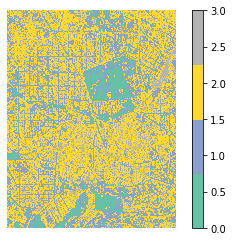

In [24]:
from matplotlib import cm
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

# identify from the image the cluster containing the green patch on the botton left and assuming the clustering picked up the greenery calculate the fraction of pixels containing vegetation in the image

In [25]:
veg = np.sum(cluster_labels == 0)
tot = np.sum(cluster_labels < 4)
n_veg = veg/tot
print("fraction of vegetation pixel {:.3f}".format(n_veg))

fraction of vegetation pixel 0.293


Cluster number 0 contains the vegetated areas.

cluster again, with 4 clusters, but now give it the center corresponding to pure colors:
remember that each pixel color is encoded by the intensity of the R G and B channel:

pure red => RGB=[1,0,0]

pure green => RGB=[0,1,0]

pure blue => RGB=[0,0,1]

also add a pixel centered on black

white: RGB=[1,1,1]

black: RGB=[0,0,0]


In [32]:
cents = np.array([[1,0,0], [0,1,0], [0,0,1], [0,0,0]])
cents

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [35]:
kmop = KMeans(n_clusters=nclusters, init=(cents), n_init=1)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True,
       init=array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]]),
       max_iter=300, n_clusters=4, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [36]:
kmop.cluster_centers_

array([[0.60499193, 0.52171771, 0.44277543],
       [0.77229644, 0.7373799 , 0.67749857],
       [0.34581216, 0.37221613, 0.32876983],
       [0.08681878, 0.17453387, 0.1256643 ]])

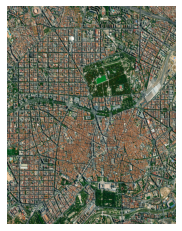

In [37]:
pl.imshow(kmop.labels_.reshape(op.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()
pl.figure()
pl.imshow(op)
pl.axis('off');

In [39]:
veg = np.sum(cluster_labels == 3)
tot = np.sum(cluster_labels < 4)
n_veg = veg/tot
print("fraction of vegetation pixel {:.3f}".format(n_veg))

fraction of vegetation pixel 0.289


Vegetated values are now in cluster 3.

The results from both initilization methods are very similar with .293 of the pixels being vegetated with kmeans++ compared to .289 with pure rgb and black color centers. Most areas appear to be classified as a greenery cluster with the first method as with the second method.

looking at the maps, identify some clusters that were associated with greenery in the first map (same cluster as the big triangular park bottom left) and are not associated with greenery in the second, or viceversa.

discuss the results 

look at the "elbow plot" below: does it suggest a best number of clusters? https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [40]:
inertias = []
for i in range(1,6):
  kmop = KMeans(n_clusters=i, random_state=302).fit(Xopscaled1)
  inertias.append(kmop.inertia_)

pl.plot(inertias)

It is hard to determine an ideal number of clusters from this plot. There appears to be a sharp elbow after 2 clusters, indicating that two clusters might be ideal.

repeat the exercize with this image of california after the fires: what is the fraction of forest that burned in this image?

In [42]:
import imageio as io
forest = io.imread("data/kalbar_drone_190113-768x512.jpg") 

In [43]:
pl.imshow(forest)

In [44]:
# preprocess the image with the sklearn.preprocessing.minmax_scale option: we want wach color channel to be in the range 0-1
from sklearn import preprocessing
d0 = preprocessing.minmax_scale(forest[:,:,0])
d1 = preprocessing.minmax_scale(forest[:,:,1])
d2 = preprocessing.minmax_scale(forest[:,:,2])
Xopscaled = np.dstack((d0, d1, d2))
Xopscaled.shape

(512, 768, 3)

In [45]:
w, h, d = original_shape = tuple(Xopscaled.shape)
Xopscaled1 = np.reshape(Xopscaled, (w * h, d))
Xopscaled1.shape

(393216, 3)

In [72]:
nclusters = 4
kmop = KMeans(nclusters)
kmop.fit(Xopscaled1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
cluster_centers = kmop.cluster_centers_
cluster_labels = kmop.labels_

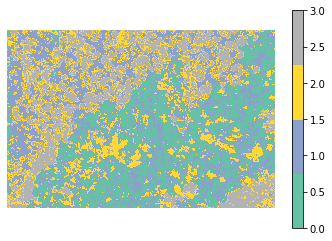

In [74]:
from matplotlib import cm
mycmap = cm.get_cmap('Set2', nclusters)
pl.imshow(kmop.labels_.reshape(forest.shape[:2]), cmap=mycmap)
pl.axis('off')
pl.colorbar()

In [75]:
burn = np.sum(cluster_labels == 0)
tot = np.sum(cluster_labels < 4)
n_burn = burn/tot
print("fraction of burned forest pixels {:.3f}".format(n_burn))

fraction of burned forest pixels 0.252
